Importamos las librerias necesarias

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

Cargamos los datos a la variable iris y usamos el modelo de arbol

In [83]:
iris=load_iris()

X_entrena, X_test, y_entrena, y_test=train_test_split(iris.data, iris.target)
arbol=DecisionTreeClassifier()
arbol.fit(X_entrena, y_entrena)
arbol.score(X_test, y_test)

0.9210526315789473

In [84]:
arbol.score(X_entrena, y_entrena)

1.0

El valor 1 no es bueno


Ahora usamos grapvhiz

In [85]:
dot_data = tree.export_graphviz(arbol , out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,impurity=False, filled=True )

In [86]:
graph = pydotplus.graph_from_dot_data(dot_data)

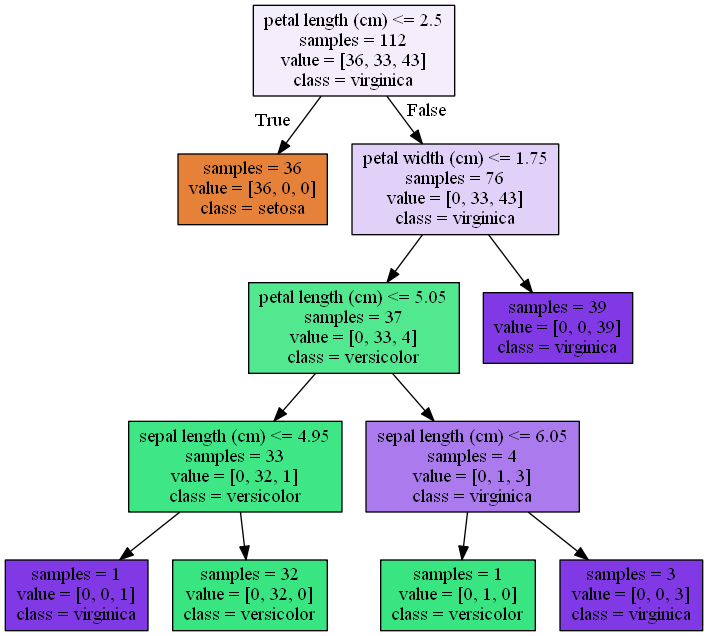

In [87]:
Image(graph.create_png())

El gráfico de barraas me  dice que característica es mas importante

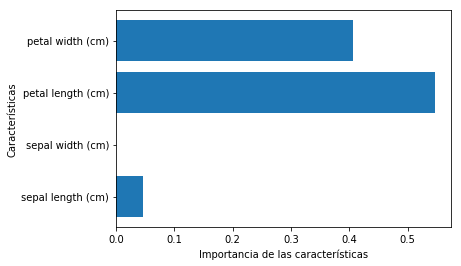

In [88]:
caract=iris.data.shape[1]
plt.barh(range(caract),arbol.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()

Podemos jugar con el modelo cambiando el nº de divisiones en este caso  y con .score podemos veer si esta cerca de uno, el valor sera mas acertado

In [89]:
arbol=DecisionTreeClassifier(max_depth=3)
arbol.fit(X_entrena, y_entrena)
arbol.score(X_test, y_test) 



0.9473684210526315

In [90]:
arbol.score(X_entrena, y_entrena)

0.9821428571428571

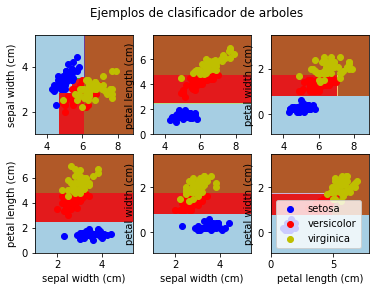

In [91]:
n_classes=3
plot_colors='bry'
plot_step=0.02

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
    X=iris.data[:,pair]
    y=iris.target
    
    clf=DecisionTreeClassifier(max_depth=3).fit(X,y)
    plt.subplot(2,3,pairidx + 1)
    
    x_min, x_max=X[:,0].min() - 1, X[:,0].max() +1
    y_min, y_max=X[:,1].min() - 1, X[:,1].max() +1
    xx, yy=np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    cs=plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis('tight')

    #plot puntos de entrenamiento
    for i, color in zip(range(n_classes), plot_colors):
        idx=np.where(y == i)
        plt.scatter(X[idx, 0], X[idx,1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.axis('tight')

plt.suptitle('Ejemplos de clasificador de arboles')

plt.legend()
plt.show()
    
    
    